# Intuition behind QQ Plots 

### Introduction 

If you have insatiable desire to answer the following questions, the search is over. 

    Do two data sets have a common distribution?
    Do two data sets have common location and scale?
    Do two data sets have similar tail behavior?
    Why do histograms suck?

In a nutshell, the QQ plot is a visual technique to compare and describe distributions. This is important because many statistical tests assume a normal distribution or require some knowledge of the distribution you are working with. The QQ plot checks that assumption. 

A QQ plot will take the shape similar to a scatter plot overlaid on a 45 degree straight line.

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/qq_plot.png' width='350'>

In practice we plot two distributions against each other and generate the scatter-like curve. Often, we will be plotting one data series (x-axis), against a perfect normal distribution as a control. If the data indeed follows the assumed distribution, then the points on the q-q plot will fall approximately on the 45 degree line, here in blue. This reference line represents two perfectly normal distributions stacked against eachother, and takes the form _y=x_. If we see deviations from the reference line, the pattern will describe aspects of the distribution, like skew, scale, symmetry, and outliers. We will go more into this soon. 

 
### Quantiles 

Q-Q plot stands for Quantile-Quantile plot. Quantiles divide a distribution into subsets, each with the same area. In Figure 2, if the area under the red curve is taken as 100%, then the four quantiles will each capture 25% of the data. A higher number of quantiles will reduce the area each captures. In statistics terms, you may hear that the probability distribution is divided into intervals with equal probabilities. This is analogous to you throwing a dart at a distribution shaped dart-board and having an equal probability of hitting any of the quantiles (don't miss). 

<img src="https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/quantiles.png" width='400'>

The q-q plot is formed by:
    
    Vertical axis: Estimated quantiles from data set 1
    Horizontal axis: Estimated quantiles from data set 2 
    
You may be realizing that the above figure looks a lot like the z-score plot. Recall that a z-score is the number of standard deviations a data point is from the mean, and __it lets us calculate the probability a data point occuring in a normally distrbuted data set.__ 

The formula for a z-score is **_z=(x-µ)/σ_** where µ is the mean, σ is the standard devation, and x is an observation.

This can be rearranged to **_x = zσ + µ_**, which is the equation for a straight line (**_y=mx+b_**); the reference line! Intuitively, instead of a linear relationship between x and y, we now have a relationship between observation x and a (proxy) probability of that oberservation, z. This knowledge is not necessary for interpretation of the plot, but it may help give an intuition of how the plot works. 

### Why not just use histograms?

Histograms are useful and intuitive, but limited. Specifically, they are limited by their design of binning data into intervals, which can dilute certain trends. The image below shows this flaw. 

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/histogram_flaw.jpg' width='500'>

Looking at the green histogram below, you can see the sample is approximately normally distributed. The bar heights for 120-122 and 122-124 make the distribution look slightly skewed, so it’s not perfectly clear. Kernel Density Estimations (KDE) are another technique to look at probability distributions, and can be implemented with the Seaborn library. The red kernel density estimation clears this issue, but the magnitude of its smoothing can hide other features. QQ plots do not bin data or smooth, and therefore avoid these problems. QQ plots are limited because we can not see the range of the data, since the data are projected as quartiles.

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/hist_kde_qq.png' width='650'>

### Interpretation 

The QQ plot is clearer. It shows the observations on the X axis plotted against the expected normal distribution score (Z-score) on the Y axis. It’s not necessary to understand the underlying calculations to interpret the plot. All you need to do is check is how well the points follow the reference line. If the points overlap the reference line, as they do above, the sample has a normal distribution.

With that knowledge, it's easy to interpret the QQ plot. Visually, the human eye can better judge the points against a straight line. And, unlike the histogram or KDE plot, there’s less ambiguity. You don’t have to try to tune parameters to optimize the plot accuracy.

If a QQ plot doesn't follow the diagonal reference line, it does **not** mean that the data is questionable. It just implies exceptions to normality. In general, there are five exceptions that are easily identifiable.

<img src="https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/qq_interp.jpg">

The implications of these QQ patterns have the following interpretations: 
<table border="1" class="dataframe">   <thead>     <tr style="text-align: right;">       <th></th>       <th>shape</th>       <th>interpretation</th>     </tr>   </thead>   <tbody>     <tr>       <th>Normal</th>       <td>linear</td>       <td>normal</td>     </tr>     <tr>       <th>Left Skew</th>       <td>concave down</td>       <td>tends to lower values</td>     </tr>     <tr>       <th>Right Skew</th>       <td>concave up</td>       <td>tends to higher values</td>     </tr>     <tr>       <th>Heavy Tailed</th>       <td>growing s-curve</td>       <td>high variance/more extrema</td>     </tr>     <tr>       <th>Light Tailed</th>       <td>dying s-curve</td>       <td>low variance/few extrema</td>     </tr>     <tr>       <th>Bimodal</th>       <td>discontinuous s-curve</td>       <td>two maxima</td>     </tr>   </tbody> </table>       

### Python Implementation

The most basic implementation of the QQ plot with the statsmodels python API is as follows: 

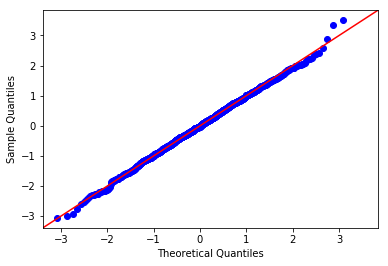

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

norm_data = np.random.normal(0,1, 1000) #normally distributed data 0-1, 100 data points 

sm.qqplot(data=norm_data, line='45')
plt.show()

In Jupyter, you can run **sm.qqplot?** in a cell for more information on the function.

Here is an implementation comparing histograms, KDE plots, and QQ plots for the 6 types of interpretations:

Right Skew
Kernel Density Estimation, Histogram                             QQ Plot


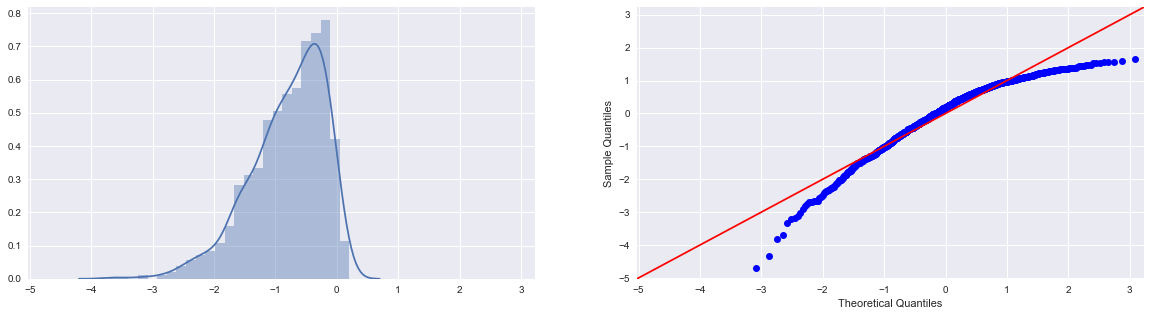

Bimodal Distribution
Kernel Density Estimation, Histogram                             QQ Plot


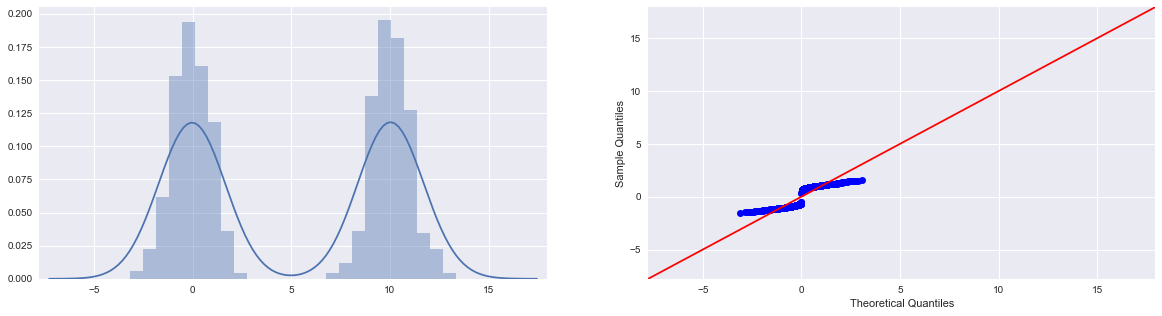

Left Skew
Kernel Density Estimation, Histogram                             QQ Plot


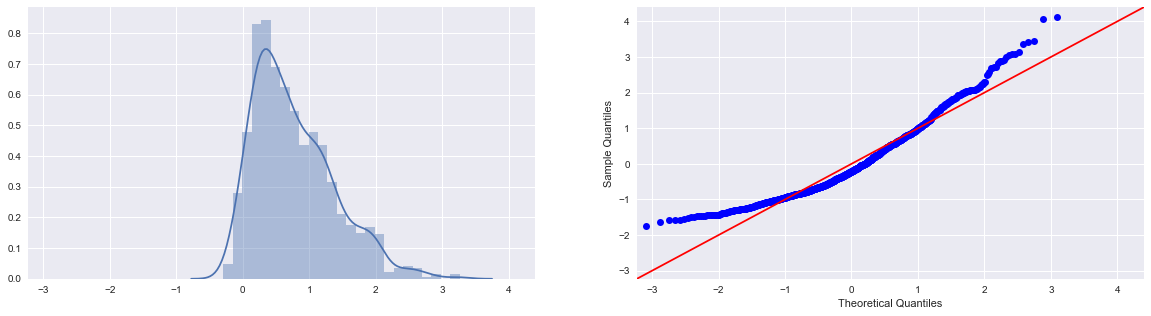

Normal Distribution
Kernel Density Estimation, Histogram                             QQ Plot


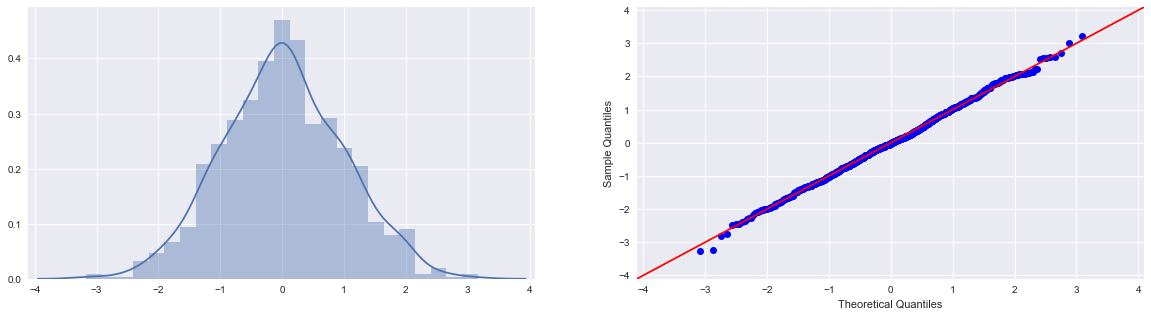

Light Tailed Distribution
Kernel Density Estimation, Histogram                             QQ Plot


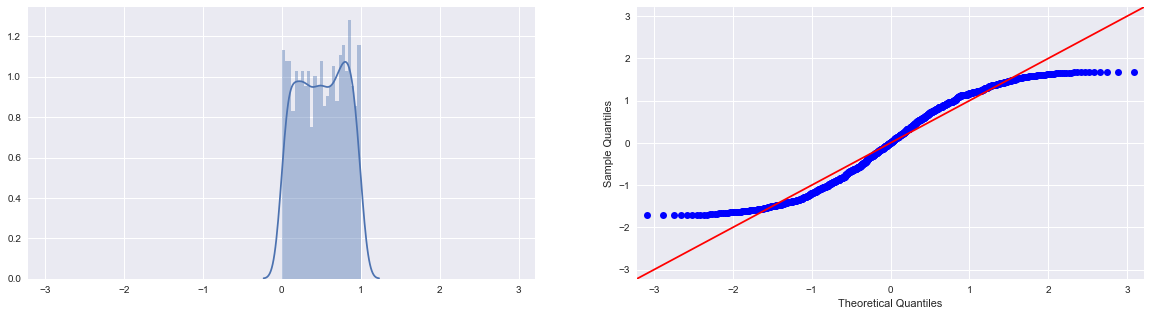

Heavy Tail Distribution
Kernel Density Estimation, Histogram                             QQ Plot


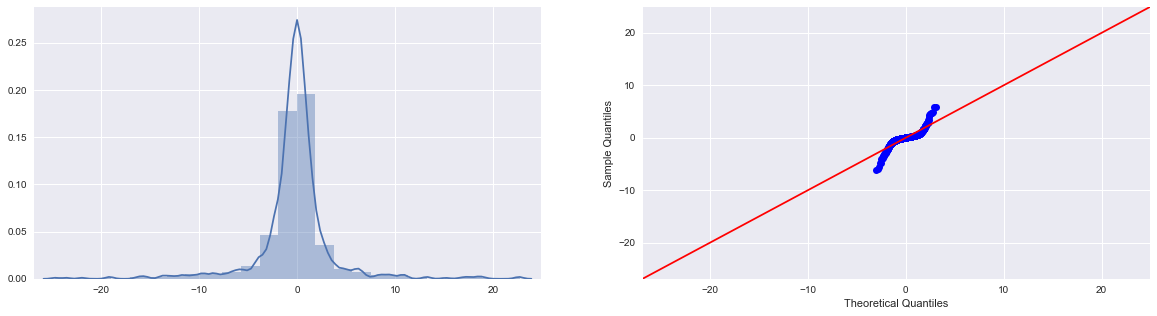

In [7]:
import seaborn as sb 
from scipy.stats import skewnorm

#create distributions 
norm_data = np.random.normal(loc=0, scale=1, size=1000)
left_skew = skewnorm.rvs(7, size=1000)
right_skew = skewnorm.rvs(-7, size=1000)
heavy_tail = np.random.standard_cauchy(size=1000)
heavy_tail = heavy_tail = heavy_tail[(heavy_tail>-25) & (heavy_tail<25)] #limit tails for plotting visuals
light_tail =  np.random.uniform(low=0, high=1, size=1000) #few extrema 
bimodal = np.concatenate((np.random.normal(loc=0, scale=1, size=500), #concat two normals w/ diff locations
                          np.random.normal(loc=10, scale=1, size=500)
                         ),axis=0)

#create dictionary for distributions 
sets = {'Normal Distribution':norm_data,
        'Left Skew':left_skew,
        'Right Skew':right_skew,
        'Heavy Tail Distribution':heavy_tail,
        'Light Tailed Distribution':light_tail,
        'Bimodal Distribution':bimodal}       

#loop and plot   
for dataset in sets:
    print dataset
    print 'Kernel Density Estimation, Histogram                             QQ Plot'
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)
    fig.set_size_inches(20,5)
    
    sb.distplot(sets[dataset], bins=25, ax=ax1) #KDE and histogram 
    sm.qqplot(data=sets[dataset], line='45', fit=True, ax=ax2) #sQQ plot
    plt.show()

### Conclusion 
Modeling usually involves making assumptions about the shape of data, and validating those assumptions is an essential scientific practice in exploratory analysis. The QQ plot does not have any reductive design parameters, such as binning for histograms and smoothing for kernel density estiamtions, which makes it a useful technique to identify features of a distribution. To perform the QQ plot, you plot one quantile of data against another and inspect the goodness of fit, comparing it to a perfectly normal reference line. Depending on how the data deviates from this straight, 45 degree line, we can infer exceptions to the normality of the data. 
    
    
### Notes
Statistics is a science, not a recipe. It is important to acknowledge that QQ plots can be variable at the tails of a distribution, and that they only become trustworthy at larger sample sizes.

Under the hood, there are two important notes: first, the actual quantile level is not plotted. For a given point on the plot, we know that the quantile level is the same for both points, but not what that quantile level actually is. Second, the sizes of the data set do not need to be the same. If they are the same, the quantiles are simply plotted against each other. If the sizes are different, the quantiles are picked for smaller data set, and then the quantiles for the larger data set are interpolated.

Sources: 

1) https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

2) https://en.wikipedia.org/wiki/Quantile

3) http://onlinestatbook.com/2/advanced_graphs/q-q_plots.html

4) http://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.html

5) https://analyse-it.com/blog/2008/11/normal-quantile-probability-plots